In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from math import sin, cos, pi
%matplotlib inline
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

In [13]:
def trajectory(theta,speed=20,height=0,dt=0.01,g=-9.81):
    vx = speed * cos(pi * theta / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,z = 0, 0, height
    ts, xs, zs = [t], [x], [z]
    while z >= 0:
        t += dt
        vz += g * dt
        x += vx * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        zs.append(z)
    return ts, xs, zs

In [14]:
def plot_trajectories(*trajs,show_seconds=False):
    for traj in trajs:
        xs, zs = traj[1], traj[2]
        plt.plot(xs,zs)
        if show_seconds:
            second_indices = []
            second = 0
            for i,t in enumerate(traj[0]):
                if t>= second:
                    second_indices.append(i)
                    second += 1
            plt.scatter([xs[i] for i in second_indices], [zs[i] for i in second_indices])
    xl = plt.xlim()
    plt.plot(plt.xlim(),[0,0],c='k')
    plt.xlim(*xl)
    
    width = 7
    coords_height = (plt.ylim()[1] - plt.ylim()[0])
    coords_width = (plt.xlim()[1] - plt.xlim()[0])
    plt.gcf().set_size_inches(width , width * coords_height / coords_width)

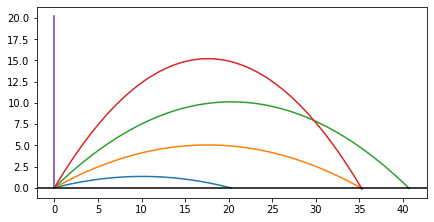

In [27]:
plot_trajectories(trajectory(15), trajectory(30), trajectory(45), trajectory(60), trajectory(90))

In [29]:
def landing_position(traj):
    return traj[1][-1]

def hang_time(traj):
    return traj[0][-1]

def max_height(traj):
    return max(traj[2])

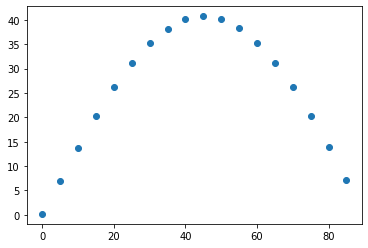

In [31]:
import matplotlib.pyplot as plt
angles = range(0, 90, 5)
landing_positions = [landing_position(trajectory(theta)) for theta in angles]
plt.scatter(angles, landing_positions)

In [33]:
max(landing_positions)

40.72935059634507

In [35]:
landing_position(trajectory(theta = 50))

40.10994684444007

In [36]:
landing_position(trajectory(theta = 130))

-40.10994684444007

Text(0, 0.5, 'hang time')

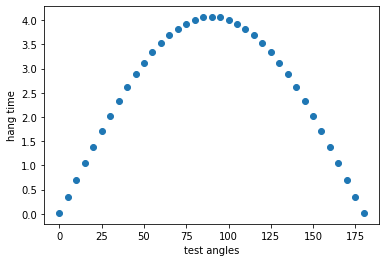

In [45]:
test_angles = range(0, 181, 5)
hang_times = [hang_time(trajectory(test_angle)) for test_angle in test_angles]
plt.scatter(test_angles, hang_times)
plt.xlabel('test angles')
plt.ylabel('hang time')

In [49]:
import numpy as np 
index = np.argmax(hang_times)
print(test_angles[index])
print(hang_times[index])

90
4.069999999999958


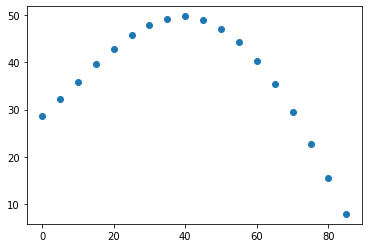

In [50]:
import matplotlib.pyplot as plt
angles = range(0, 90, 5)
landing_positions = [landing_position(trajectory(theta, height = 10)) for theta in angles]
plt.scatter(angles, landing_positions)

In [51]:
index = np.argmax(landing_positions)
print(angles[index])
print(landing_positions[index])

40
49.79288880273331


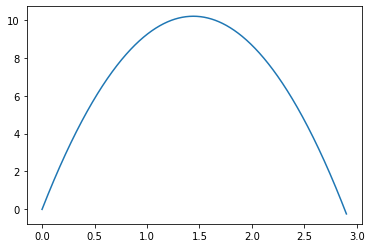

In [52]:
def z(t):
    return 20 * sin(45 * pi / 180) * t + (-9.81/2) * t ** 2

plot_function(z, 0, 2.9)

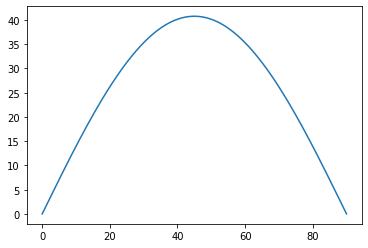

In [54]:
def r(theta):
    return (-2*20*20/-9.81)*sin(theta*pi/180)*cos(theta*pi/180)
plot_function(r,0,90)

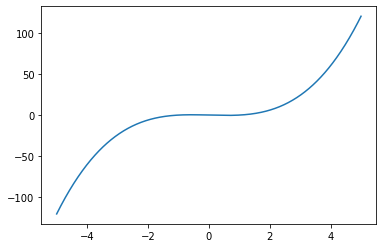

In [55]:
plot_function(lambda x : x**3 - x, -5, 5)

In [70]:
def trajectory3d(theta,phi,speed=20,height=0,dt=0.01,g=-9.81,elevation=flat_ground):
    vx = speed * cos(pi * theta / 180) * cos(pi * phi / 180)
    vy = speed * cos(pi * theta / 180) * sin(pi * phi / 180)
    vz = speed * sin(pi * theta / 180)
    t,x,y,z = 0, 0, 0, height
    ts, xs, ys, zs = [t], [x], [y], [z]
    while z >= elevation(x,y):
        t += dt
        vz += g * dt
        x += vx * dt
        y += vy * dt
        z += vz * dt
        ts.append(t)
        xs.append(x)
        ys.append(y)
        zs.append(z)
    return ts, xs, ys, zs

In [71]:
def flat_ground(x,y):
    return 0

def ridge(x,y):
    return (x**2 - 5*y**2) / 2500

In [72]:
def plot_trajectory3d(traj):
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(7,7)
    ax = fig.gca(projection='3d')
    ax.plot(traj[1],traj[2],traj[3])

/home/sergio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  after removing the cwd from sys.path.
/home/sergio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


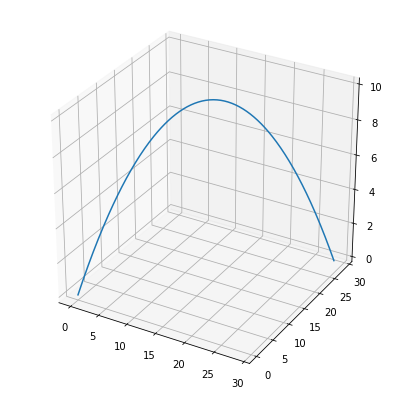

In [73]:
plot_trajectory3d(trajectory3d(45,45))

In [74]:
def plot_trajectories_3d(*trajs,elevation=flat_ground,bounds=None,zbounds=None,shadows=False):
    fig, ax = plt.gcf(), plt.gca(projection='3d')
    fig.set_size_inches(7,7)    

    if not bounds:
        xmin = min([x for traj in trajs for x in traj[1]])
        xmax = max([x for traj in trajs for x in traj[1]])
        ymin = min([x for traj in trajs for x in traj[2]])
        ymax = max([x for traj in trajs for x in traj[2]])

        padding_x = 0.1 * (xmax-xmin)
        padding_y = 0.1 * (ymax-ymin)
        xmin -= padding_x
        xmax += padding_x
        ymin -= padding_y
        ymax += padding_x
    
    else:
        xmin, xmax, ymin, ymax = bounds
    

    plt.plot([xmin,xmax],[0,0],[0,0],c='k')
    plt.plot([0,0],[ymin,ymax],[0,0],c='k')

    g = np.vectorize(elevation)
    ground_x = np.linspace(xmin, xmax, 20)
    ground_y = np.linspace(ymin, ymax, 20)
    ground_x, ground_y = np.meshgrid(ground_x,ground_y)
    ground_z = g(ground_x,ground_y)
    ax.plot_surface(ground_x, ground_y, ground_z, cmap=cm.coolwarm, alpha=0.5,
                       linewidth=0, antialiased=True)
    for traj in trajs:
        ax.plot(traj[1],traj[2],traj[3])
        if shadows:
            ax.plot([traj[1][0],traj[1][-1]],[traj[2][0],traj[2][-1]],[0,0],c='gray',linestyle='dashed')
    
    if zbounds:
        ax.set_zlim(*zbounds)

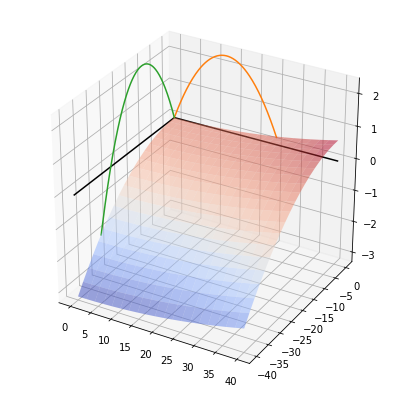

In [76]:
plot_trajectories_3d(
    trajectory3d(20,0,elevation=ridge),
    trajectory3d(20,270,elevation=ridge),
    bounds=[0,40,-40,0],
    elevation=ridge)